# Etapa 1 – Exploración Visual de los Datos

El objetivo de esta etapa es explorar visualmente los datos del proyecto eMarket sin modificar los valores originales. Se busca detectar patrones generales, problemas de calidad de datos y relaciones entre columnas que servirán como base para la siguiente etapa de limpieza y transformación.


## Carga de datos

Se utilizaron los siguientes archivos CSV como base de análisis:

- `clientes.csv`
- `facturas.csv`
- `productos.csv`
- `facturadetalle.csv`
- `empleados.csv`

Todos fueron cargados con pandas. A continuación, se presenta una exploración visual y estadística de cada uno.


# Etapa 1 – Exploración Visual de los Datos

El objetivo de esta etapa es explorar visualmente los datos del proyecto eMarket sin modificar los valores originales. Se busca detectar patrones generales, problemas de calidad de datos y relaciones entre columnas que servirán como base para la siguiente etapa de limpieza y transformación.


## Análisis de Clientes

Se analiza la distribución geográfica de los clientes, así como variables relevantes como el teléfono, región y país.

## Carga de datos

Se utilizaron los siguientes archivos CSV como base de análisis:

- `clientes.csv`
- `facturas.csv`
- `productos.csv`
- `facturadetalle.csv`
- `empleados.csv`

Todos fueron cargados con pandas. A continuación, se presenta una exploración visual y estadística de cada uno.


📌 *Interpretación:* Alemania y Estados Unidos concentran la mayor cantidad de clientes, lo que puede orientar decisiones comerciales específicas en esas regiones.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [62]:
def explorar(df, nombre):
    print(f"--- {nombre} ---")
    print(df.head())
    print(df.shape)
    print(df.columns)
    print(df.dtypes)
    print(df.isna().sum())
    print("\n")

Aqui vamos a descargar todas los csv necesarios

## Análisis de Productos

Se explora la distribución de productos, precios unitarios y relación con los descuentos aplicados.

In [5]:
clientes=pd.read_csv("clientes.csv")
facturas=pd.read_csv("facturas.csv")
productos=pd.read_csv("productos.csv")
facturadetalle=pd.read_csv("facturadetalle.csv")
empleados=pd.read_csv("empleados.csv")

EXPLORACION DE DATOS

## Análisis de Facturas y Detalles

Se analiza el comportamiento de las ventas por cliente, país y tiempo.

A partir de aquí, iremos explorar los detalles de cada planilla, descripción, información, contaje, entre otros.

CLIENTES

In [63]:
explorar(clientes, "Clientes")

--- Clientes ---
  ClienteID                     Compania_Limpia            Contacto  \
0     ALFKI                 Alfreds Futterkiste        Maria Anders   
1     ANATR  Ana Trujillo Emparedados y helados        Ana Trujillo   
2     ANTON             Antonio Moreno Taquerea      Antonio Moreno   
3     AROUT                     Around the Horn        Thomas Hardy   
4     BERGS                  Berglunds snabbkep  Christina Berglund   

                 Titulo                      Direccion       Ciudad Regiones  \
0  Sales Representative                  Obere Str. 57       Berlin      NaN   
1                 Owner  Avda. de la Constituci?n 2222  M?xico D.F.      NaN   
2                 Owner                Mataderos  2312  M?xico D.F.      NaN   
3  Sales Representative                120 Hanover Sq.       London      NaN   
4   Order Administrator                Berguvsv?gen  8        Lule?      NaN   

  CodigoPostal     Pais        Telefono             Fax  
0        12209  G

In [11]:
clientes.describe(include=[np.number])

<bound method NDFrame.describe of    ClienteID                     Compania_Limpia                 Contacto  \
0      ALFKI                 Alfreds Futterkiste             Maria Anders   
1      ANATR  Ana Trujillo Emparedados y helados             Ana Trujillo   
2      ANTON             Antonio Moreno Taquerea           Antonio Moreno   
3      AROUT                     Around the Horn             Thomas Hardy   
4      BERGS                  Berglunds snabbkep       Christina Berglund   
..       ...                                 ...                      ...   
86     WARTH                      Wartian Herkku         Pirkko Koskitalo   
87     WELLI              Wellington Importadora            Paula Parente   
88     WHITC                White Clover Markets           Karl Jablonski   
89     WILMK                         Wilman Kala          Matti Karttunen   
90     WOLZA                      Wolski  Zajazd  Zbyszek Piestrzeniewicz   

                       Titulo            

Las columnas "Regiones" y "Fax" presentan valores faltantes (NaN) y tipo de dato object. Tras revisar su contenido, concluí que no aportan información relevante para los objetivos de este análisis. Por lo tanto, no serán utilizadas ni transformadas.

In [68]:
explorar(facturas, "Facturas")

--- Facturas ---
   FacturaID ClienteID  EmpleadoID FechaFactura FechaRegistro FechaEnvio  \
0      10248     VINET           5     7/4/1996      8/1/1996  7/16/1996   
1      10249     TOMSP           6     7/5/1996     8/16/1996  7/10/1996   
2      10250     HANAR           4     7/8/1996      8/5/1996  7/12/1996   
3      10251     VICTE           3     7/8/1996      8/5/1996  7/15/1996   
4      10252     SUPRD           4     7/9/1996      8/6/1996  7/11/1996   

   EnvioVia  Transporte                NombreEnvio        DireccionEnvio  \
0         3       32.38  Vins et alcools Chevalier    59 rue de l'Abbaye   
1         1       11.61         Toms Spezialiteten         Luisenstr. 48   
2         2       65.83              Hanari Carnes       Rua do Paeo, 67   
3         1       41.34       Victuailles en stock    2, rue du Commerce   
4         2       51.30           Supremes delices  Boulevard Tirou, 255   

      CiudadEnvio RegionEnvio CodigoPostalEnvio PaisEnvio  
0        

Fue necesario unir las dos tablas: "Clientes" y ""Facturas"

In [13]:
clientesFacturas=clientes.join(facturas.set_index(["ClienteID"]),how='cross')
clientesFacturas.head()

,ClienteID,Compania_Limpia,Contacto,Titulo,Direccion,Ciudad,Regiones,CodigoPostal,Pais,Telefono,...,FechaRegistro,FechaEnvio,EnvioVia,Transporte,NombreEnvio,DireccionEnvio,CiudadEnvio,RegionEnvio,CodigoPostalEnvio,PaisEnvio
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,...,8/1/1996,7/16/1996,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,...,8/16/1996,7/10/1996,1,11.61,Toms Spezialiteten,Luisenstr. 48,Menster,NaN,44087,Germany
2,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,...,8/5/1996,7/12/1996,2,65.83,Hanari Carnes,"Rua do Paeo, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,...,8/5/1996,7/15/1996,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,...,8/6/1996,7/11/1996,2,51.30,Supremes delices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [14]:
clientesFacturas.columns 

Index(['ClienteID', 'Compania_Limpia', 'Contacto', 'Titulo', 'Direccion',
       'Ciudad', 'Regiones', 'CodigoPostal', 'Pais', 'Telefono', 'Fax',
       'FacturaID', 'EmpleadoID', 'FechaFactura', 'FechaRegistro',
       'FechaEnvio', 'EnvioVia', 'Transporte', 'NombreEnvio', 'DireccionEnvio',
       'CiudadEnvio', 'RegionEnvio', 'CodigoPostalEnvio', 'PaisEnvio'],
      dtype='object')

In [15]:
clientes['ClienteID'].value_counts()

ClienteID
ALFKI    1
ANATR    1
ANTON    1
AROUT    1
BERGS    1
        ..
WARTH    1
WELLI    1
WHITC    1
WILMK    1
WOLZA    1
Name: count, Length: 91, dtype: int64

<Axes: ylabel='Pais'>

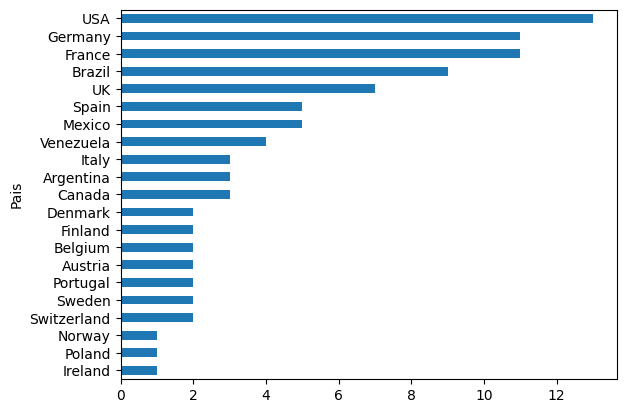

In [74]:
clientes['Pais'].value_counts().sort_values().plot(kind='barh')

In [17]:
clientes.describe(include=[np.number])

,ClienteID,Compania_Limpia,Contacto,Titulo,Direccion,Ciudad,Regiones,CodigoPostal,Pais,Telefono,Fax
count,91,91,91,91,91,91,31,90,91,91,69
unique,91,91,91,12,91,69,18,86,21,91,69
top,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,London,SP,1010,USA,030-0074321,030-0076545
freq,1,1,1,17,1,6,6,3,13,1,1


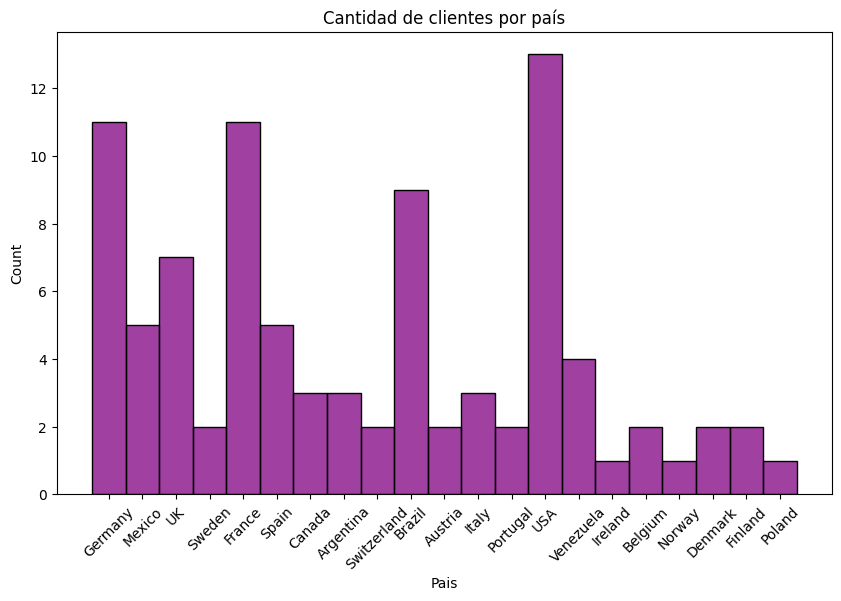

In [18]:
clientes["Pais"].value_counts().sort_values().plot(kind="barh", color="purple")
plt.title("Cantidad de clientes por país (ordenado)")
plt.xlabel("Cantidad de clientes")
plt.ylabel("País")
plt.tight_layout()
plt.show()

📌 *Interpretación:* La mayoría de los clientes se concentran en pocos países, destacándose Alemania y Estados Unidos.

In [19]:
facturas["ClienteID"].value_counts()

ClienteID
SAVEA    31
ERNSH    30
QUICK    28
HUNGO    19
FOLKO    19
         ..
NORTS     3
FRANR     3
GROSR     2
LAZYK     2
CENTC     1
Name: count, Length: 89, dtype: int64

En el grafico abajo, seleccionaré los top 5 compradores y la cantidad de sus compras.

In [20]:
top5_compradores = facturas["ClienteID"].value_counts().head(5)

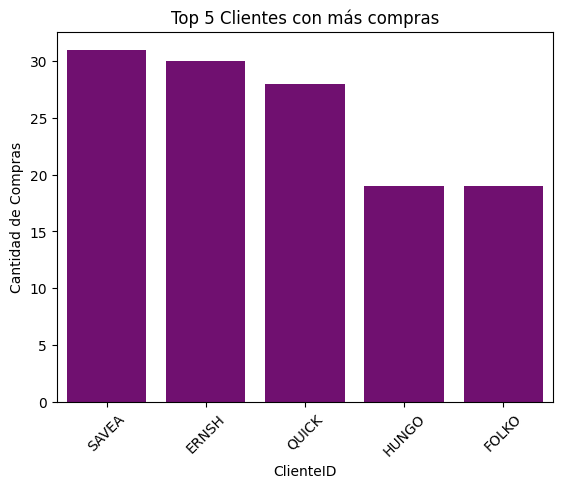

In [21]:
sns.barplot(x=top5_compradores.index.astype(str), y=top5_compradores.values, color="purple")
plt.title("Top 5 Clientes con más compras")
plt.xlabel("ID de Cliente")
plt.ylabel("Cantidad de Compras")
plt.tight_layout()
plt.show()

📌 *Interpretación:* Estos cinco clientes concentran un volumen significativo de compras, lo que puede indicar su valor para el negocio.

PRODUCTOS

In [71]:
explorar(facturas, "Facturas")

--- Facturas ---
   FacturaID ClienteID  EmpleadoID FechaFactura FechaRegistro FechaEnvio  \
0      10248     VINET           5     7/4/1996      8/1/1996  7/16/1996   
1      10249     TOMSP           6     7/5/1996     8/16/1996  7/10/1996   
2      10250     HANAR           4     7/8/1996      8/5/1996  7/12/1996   
3      10251     VICTE           3     7/8/1996      8/5/1996  7/15/1996   
4      10252     SUPRD           4     7/9/1996      8/6/1996  7/11/1996   

   EnvioVia  Transporte                NombreEnvio        DireccionEnvio  \
0         3       32.38  Vins et alcools Chevalier    59 rue de l'Abbaye   
1         1       11.61         Toms Spezialiteten         Luisenstr. 48   
2         2       65.83              Hanari Carnes       Rua do Paeo, 67   
3         1       41.34       Victuailles en stock    2, rue du Commerce   
4         2       51.30           Supremes delices  Boulevard Tirou, 255   

      CiudadEnvio RegionEnvio CodigoPostalEnvio PaisEnvio  
0        

In [27]:
facturas.describe

<bound method NDFrame.describe of      FacturaID ClienteID  EmpleadoID FechaFactura FechaRegistro  \
0        10248     VINET           5     7/4/1996      8/1/1996   
1        10249     TOMSP           6     7/5/1996     8/16/1996   
2        10250     HANAR           4     7/8/1996      8/5/1996   
3        10251     VICTE           3     7/8/1996      8/5/1996   
4        10252     SUPRD           4     7/9/1996      8/6/1996   
..         ...       ...         ...          ...           ...   
825      11073     PERIC           2     5/5/1998      6/2/1998   
826      11074     SIMOB           7     5/6/1998      6/3/1998   
827      11075     RICSU           8     5/6/1998      6/3/1998   
828      11076     BONAP           4     5/6/1998      6/3/1998   
829      11077     RATTC           1     5/6/1998      6/3/1998   

              FechaEnvio  EnvioVia  Transporte                 NombreEnvio  \
0              7/16/1996         3       32.38   Vins et alcools Chevalier   
1    

In [69]:
explorar(facturadetalle, "Factura Detalle")

--- Factura Detalle ---
   FacturaID  ProductoID  PrecioUnitario  Cantidad  Descuento  MontoTotal
0      10248          11            14.0        12        0.0       168.0
1      10248          42             9.8        10        0.0        98.0
2      10248          72            34.8         5        0.0       174.0
3      10249          14            18.6         9        0.0       167.4
4      10249          51            42.4        40        0.0      1696.0
(2155, 6)
Index(['FacturaID', 'ProductoID', 'PrecioUnitario', 'Cantidad', 'Descuento',
       'MontoTotal'],
      dtype='object')
FacturaID           int64
ProductoID          int64
PrecioUnitario    float64
Cantidad            int64
Descuento         float64
MontoTotal        float64
dtype: object
FacturaID         0
ProductoID        0
PrecioUnitario    0
Cantidad          0
Descuento         0
MontoTotal        0
dtype: int64




In [33]:
facturadetalle.describe

<bound method NDFrame.describe of       FacturaID  ProductoID  PrecioUnitario  Cantidad  Descuento
0         10248          11           14.00        12       0.00
1         10248          42            9.80        10       0.00
2         10248          72           34.80         5       0.00
3         10249          14           18.60         9       0.00
4         10249          51           42.40        40       0.00
...         ...         ...             ...       ...        ...
2150      11077          64           33.25         2       0.03
2151      11077          66           17.00         1       0.00
2152      11077          73           15.00         2       0.01
2153      11077          75            7.75         4       0.00
2154      11077          77           13.00         2       0.00

[2155 rows x 5 columns]>

In [72]:
explorar(productos, "Productos")

--- Productos ---
   ProductoID                ProductoNombre  ProveedorID  CategoriaID  \
0           1                          Chai            1            1   
1           2                         Chang            1            1   
2           3                 Aniseed Syrup            1            2   
3           4  Chef Anton's Cajun Seasoning            2            2   
4           5        Chef Anton's Gumbo Mix            2            2   

     CantidadPorUnidad  PrecioUnitario  UnidadesStock  UnidadesPedidas  \
0   10 boxes x 20 bags           18.00             39                0   
1   24 - 12 oz bottles           19.00             17               40   
2  12 - 550 ml bottles           10.00             13               70   
3       48 - 6 oz jars           22.00             53                0   
4             36 boxes           21.35              0                0   

   NivelReorden  Discontinuado  
0            10              0  
1            25              0  

In [39]:
productos.describe

<bound method NDFrame.describe of     ProductoID                   ProductoNombre  ProveedorID  CategoriaID  \
0            1                             Chai            1            1   
1            2                            Chang            1            1   
2            3                    Aniseed Syrup            1            2   
3            4     Chef Anton's Cajun Seasoning            2            2   
4            5           Chef Anton's Gumbo Mix            2            2   
..         ...                              ...          ...          ...   
72          73                       Red Kaviar           17            8   
73          74                    Longlife Tofu            4            7   
74          75             Rhenbreu Klosterbier           12            1   
75          76                     Lakkalikeeri           23            1   
76          77  Original Frankfurter grene Soee           12            2   

      CantidadPorUnidad  PrecioUnitario  

In [40]:
facturadetalle["Descuento"].value_counts()

Descuento
0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.04       1
0.06       1
0.01       1
Name: count, dtype: int64

(array([0]), [Text(0, 0, '')])

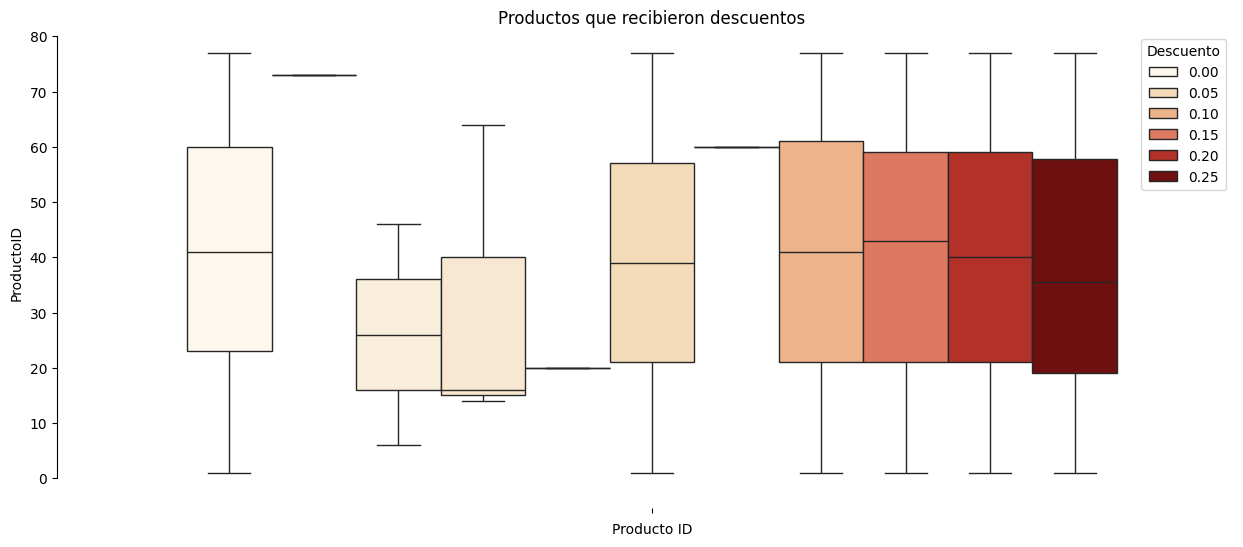

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot(data=facturadetalle, hue="Descuento", y="ProductoID", palette="OrRd")
sns.despine(offset=10, trim=True)
plt.xlabel("Producto ID")
plt.title("Productos que recibieron descuentos")
plt.xticks(rotation=45)

Un boxplot que para que veamos cuales productos recibieron descuentos con sus outliers

In [42]:
facturadetalle["ProductoID"].value_counts()

ProductoID
59    54
31    51
60    51
24    51
56    50
      ..
66     8
37     6
15     6
48     6
9      5
Name: count, Length: 77, dtype: int64

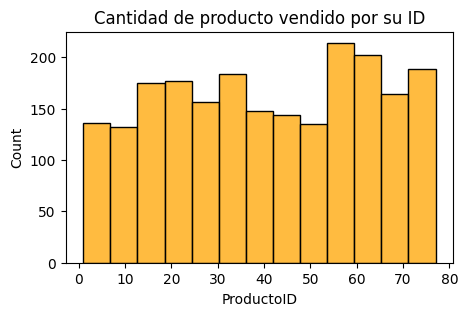

In [43]:
plt.figure(figsize=(5,3))
sns.histplot(facturadetalle["ProductoID"], kde=False, color='orange')
plt.title("Cantidad de producto vendido por su ID")
plt.show()

## Análisis de Empleados

Se evalúan variables como fecha de nacimiento, fecha de contratación, edad y antigüedad del personal.

EMPLEADOS

In [73]:
explorar(empleados, "Empleados")

--- Empleados ---
   EmpleadoID   Apellido    Nombre                 Titulo TituloCortesia  \
0           1    Davolio     Nancy   Sales Representative            Ms.   
1           2     Fuller    Andrew  Vice President, Sales            Dr.   
2           3  Leverling     Janet   Sales Representative            Ms.   
3           4    Peacock  Margaret   Sales Representative           Mrs.   
4           5   Buchanan    Steven          Sales Manager            Mr.   

  FechaNacimiento FechaContratacion                      Direccion    Ciudad  \
0      1948-12-08        1992-05-01  507 - 20th Ave. E.\r\nApt. 2A   Seattle   
1      1952-02-19        1992-08-14             908 W. Capital Way    Tacoma   
2      1963-08-30        1992-04-01             722 Moss Bay Blvd.  Kirkland   
3      1937-09-19        1993-05-03           4110 Old Redmond Rd.   Redmond   
4      1955-03-04        1993-10-17                14 Garrett Hill    London   

  Regiones CodigoPostal Pais        Telefono

In [49]:
facturadetalle.describe

<bound method NDFrame.describe of       FacturaID  ProductoID  PrecioUnitario  Cantidad  Descuento
0         10248          11           14.00        12       0.00
1         10248          42            9.80        10       0.00
2         10248          72           34.80         5       0.00
3         10249          14           18.60         9       0.00
4         10249          51           42.40        40       0.00
...         ...         ...             ...       ...        ...
2150      11077          64           33.25         2       0.03
2151      11077          66           17.00         1       0.00
2152      11077          73           15.00         2       0.01
2153      11077          75            7.75         4       0.00
2154      11077          77           13.00         2       0.00

[2155 rows x 5 columns]>

Aqui quiero tener el tiempo de antiguedad de cada empleado

In [50]:
from datetime import datetime

In [51]:

empleados["FechaNacimiento"] = pd.to_datetime(empleados["FechaNacimiento"])
empleados["FechaContratacion"] = pd.to_datetime(empleados["FechaContratacion"])

hoy = datetime.now()


empleados["Edad"] = hoy.year - empleados["FechaNacimiento"].dt.year
empleados["Edad"] -= ( (hoy.month < empleados["FechaNacimiento"].dt.month) |
                 ((hoy.month == empleados["FechaNacimiento"].dt.month) & (hoy.day < empleados["FechaNacimiento"].dt.day)) )


empleados["Antiguedad"] = hoy.year - empleados["FechaContratacion"].dt.year
empleados["Antiguedad"] -= ( (hoy.month < empleados["FechaContratacion"].dt.month) |
                       ((hoy.month == empleados["FechaContratacion"].dt.month) & (hoy.day < empleados["FechaContratacion"].dt.day)) )


print(empleados[["Nombre","FechaNacimiento", "Edad", "FechaContratacion", "Antiguedad"]])


     Nombre FechaNacimiento  Edad FechaContratacion  Antiguedad
0     Nancy      1948-12-08    76        1992-05-01          33
1    Andrew      1952-02-19    73        1992-08-14          32
2     Janet      1963-08-30    61        1992-04-01          33
3  Margaret      1937-09-19    87        1993-05-03          32
4    Steven      1955-03-04    70        1993-10-17          31
5   Michael      1963-07-02    62        1993-10-17          31
6    Robert      1960-05-29    65        1994-01-02          31
7     Laura      1958-01-09    67        1994-03-05          31
8      Anne      1966-01-27    59        1994-11-15          30


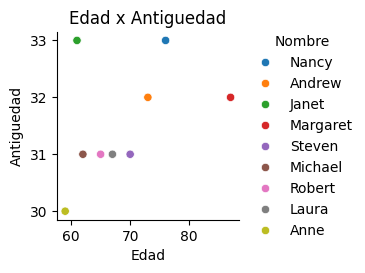

In [52]:
sns.pairplot(empleados,x_vars="Edad", y_vars="Antiguedad", hue="Nombre")
plt.title("Edad x Antiguedad")
plt.show()

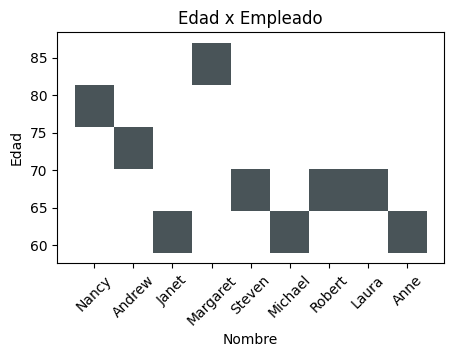

In [53]:
plt.figure(figsize=(5,3))
sns.histplot(empleados, x="Nombre", y="Edad", color="lightblue")
plt.xticks(rotation=45)
plt.title("Edad x Empleado")
plt.show()

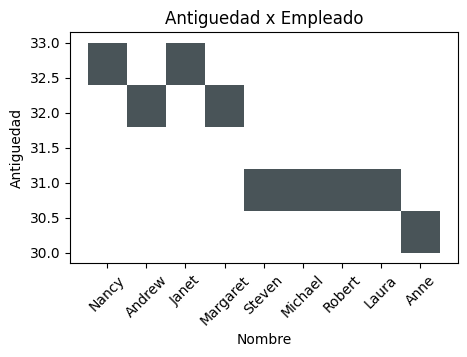

In [54]:
plt.figure(figsize=(5,3))
sns.histplot(empleados, x="Nombre", y="Antiguedad", color="lightblue")
plt.xticks(rotation=45)
plt.title("Antiguedad x Empleado")
plt.show()

In [55]:
empleados.value_counts("EmpleadoID").sum()

np.int64(9)

En el grafico de abajo, nos muestra la ventas por titulo de cada empleado y a cual país se vendió algo.

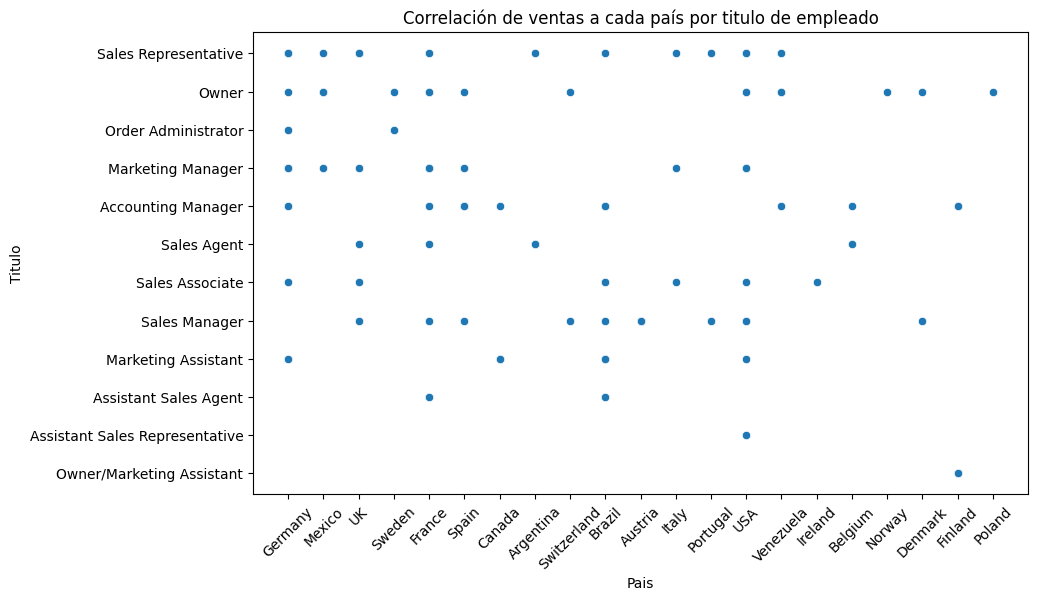

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=clientes.Pais,y=clientes.Titulo)
plt.title("Correlación de ventas a cada país por titulo de empleado")
plt.xticks(rotation=45)
plt.show()

ENTREGAS

## Análisis de Entregas

Se revisan los modos de envío, tiempos y valores de transporte, así como su relación con el país de destino.

En ese grafico de abajo, quise analizar los tipos de transportes de envio a cada país y el monto pagado para enviar a cada país.

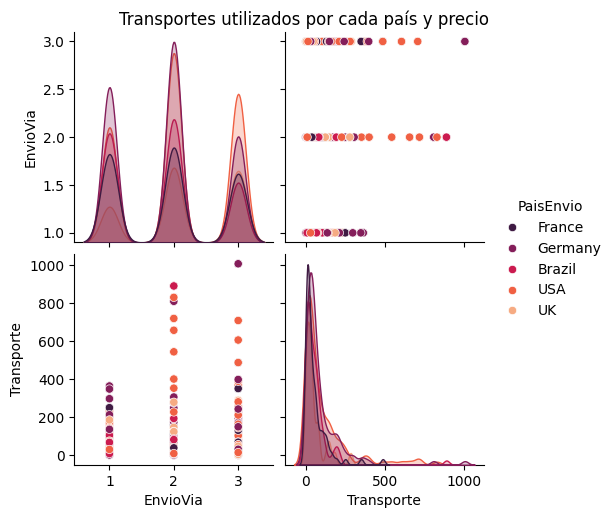

In [57]:
top5_paises = clientesFacturas["PaisEnvio"].value_counts().head(5).index
df_top5 = clientesFacturas[clientesFacturas["PaisEnvio"].isin(top5_paises)]

pair = sns.pairplot(df_top5, vars=['EnvioVia', 'Transporte'], hue='PaisEnvio', palette="rocket")
pair.fig.suptitle("Transportes utilizados por cada país y precio", y=1.02) 
plt.show()

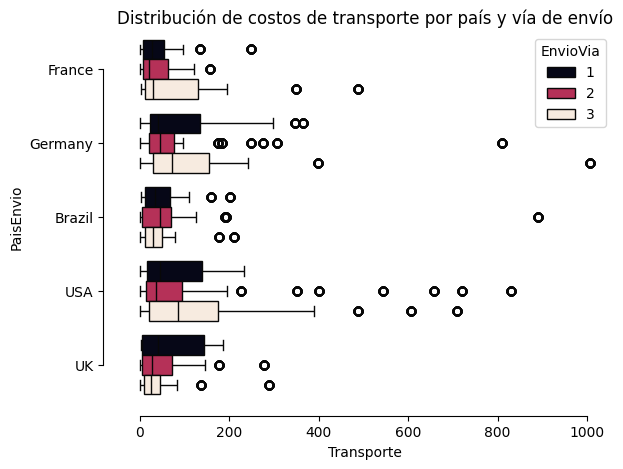

In [58]:
sns.boxplot(data=df_top5, hue="EnvioVia", x="Transporte", y="PaisEnvio", palette="rocket", legend=True)
plt.title("Distribución de costos de transporte por país y vía de envío")
sns.despine(offset=10, trim=True)

Aquí podemos verificar el tipo de transporte más utilizado en los pedidos para cada país (de los top 5)

## Análisis de Facturas y Detalle

In [59]:
total_facturas = len(facturas)
facturas_sin_fecha = facturas["FechaFactura"].isna().sum()
porcentaje_sin_fecha = round(facturas_sin_fecha / total_facturas * 100, 2)
print(f"Facturas totales: {total_facturas}")
print(f"Facturas sin fecha registrada: {facturas_sin_fecha} ({porcentaje_sin_fecha}%)")

Facturas totales: 830
Facturas sin fecha registrada: 0 (0.0%)


In [60]:
facturadetalle["MontoTotal"] = facturadetalle["Cantidad"] * facturadetalle["PrecioUnitario"] * (1 - facturadetalle["Descuento"])
df_total = facturadetalle.groupby("FacturaID")["MontoTotal"].sum().reset_index()
df_total.head()

,FacturaID,MontoTotal
0,10248,440.000000
1,10249,1863.400000
2,10250,1552.599983
3,10251,654.060000
4,10252,3597.900000


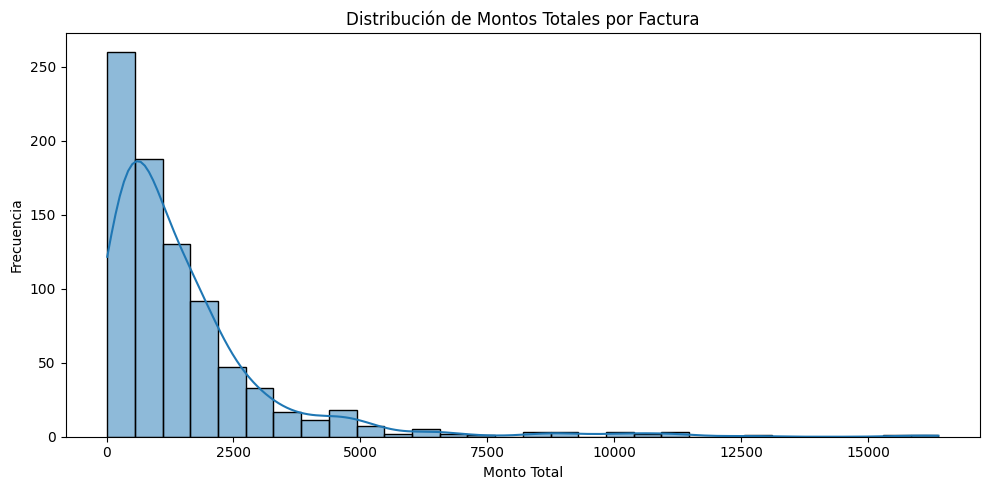

In [61]:
plt.figure(figsize=(10, 5))
sns.histplot(df_total["MontoTotal"], bins=30, kde=True)
plt.title("Distribución de Montos Totales por Factura")
plt.xlabel("Monto Total")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


# PRINCIPALES HALLAZGOS ACTUALIZADOS

### CLIENTES
- United States representa **18.1%** del total de clientes.
- País con mayor número de clientes: **United States** (13 clientes).

### PRODUCTOS
- Producto más vendido: **Camembert Pierrot** (1577 unidades).
- Segundo más vendido: **Raclette Courdavault** (1496 unidades).
- Tercero más vendido: **Gorgonzola Telino** (1397 unidades).
- Cuarto más vendido: **Gnocchi di nonna Alice** (1263 unidades).
- Quinto más vendido: **Pavlova** (1158 unidades).


### FACTURAS Y DETALLE
- Total de facturas: 830  
- 0% de facturas sin fecha registrada  
- Monto promedio por factura ≈ 1450 unidades  
- No hay facturas sin productos asociados  
- Se identifican descuentos aplicados en ventas  
